# 01-LeNet5

![](https://images.unsplash.com/photo-1495592528496-a143a67931d6?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w=1050&q=80)

Photo by [Pietro Jeng](https://unsplash.com/photos/sQVXS8HBPPc)

In this exercise, we will apply the LeNet5 algorithm to the Fashion MNIST dataset and improve your performances.

We will first download the data from the keras datasets `fashion_mnist`

![](https://cdn-images-1.medium.com/max/800/1*yq2a2Iwms35TuaPqrUeTsA.png)

# Import the fashion_mnist dataset

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras.utils as util

In [65]:
# TODO: load the fashion_mnist dataset from keras
# Load the fashion-mnist pre-shuffled train data and test data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [45]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

As you already know, this dataset contains 10 classes:
* 0:	T-shirt/top
* 1:	Trouser
* 2:	Pullover
* 3:	Dress
* 4:	Coat
* 5:	Sandal
* 6:	Shirt
* 7:	Sneaker
* 8:	Bag
* 9:	Ankle boot

You can have a look at some images if needed, even if you already know them.

# Visualize the data

In [10]:
labels = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [21]:
img_index = np.random.randint(0, 10)
labels[np.unique(y_train)[img_index]]

'Sandal'

TypeError: Invalid dimensions for image data

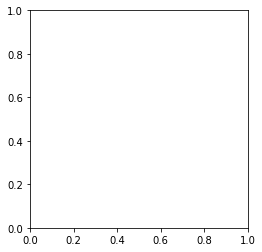

In [85]:
# TODO: Explore the data, display some input images if needed
# Show one of the images from the training dataset
img_index = np.random.randint(0, 60000)
plt.imshow(x_train[img_index], cmap='gray')

plt.title(labels[y_train[img_index]])
plt.show()

Make the data preparation and preprocessing: scale and reshape the data, put the labels to the good shape.

# Data normalization

In [66]:
# TODO: Make the data preparation

#Reshape
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2],1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2],1)

#ReScaling
x_train = x_train / 255.
x_test = x_test / 255.


#labels 
y_train_vect = util.to_categorical(y_train, num_classes=None, dtype='float32')
y_test_vect = util.to_categorical(y_test, num_classes=None, dtype='float32')

# Model

Now build the LeNet5 architecture. You can reuse the one of the course, or try to build it by yourself.

The architecture is the following:

![](../../../00-Lectures/images/Lenet5.png)

In [67]:
# TODO: Build your model
from keras.models import Sequential
from keras.layers import MaxPooling2D, Conv2D, Flatten, Dense


def lenet5():
    
    model = Sequential()

    # Layer C1
    model.add(Conv2D(filters=6, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
    # Layer S2
    model.add(MaxPooling2D(pool_size=(2, 2)))
    # Layer C3
    model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu'))
    # Layer S4
    model.add(MaxPooling2D(pool_size=(2, 2)))
    # Before going into layer C5, we flatten our units
    model.add(Flatten())
    # Layer C5
    model.add(Dense(units=120, activation='relu'))
    # Layer F6
    model.add(Dense(units=84, activation='relu'))
    # Output layer
    model.add(Dense(units=10, activation = 'softmax'))
    
    return model

In [68]:
from keras.callbacks import EarlyStopping
from keras.callbacks import TensorBoard

# Instantiate the model
model = lenet5()

# Compile the model

Now compile and fit your model on your training data.
We use model.compile() to configure the learning process before training the model. This is where you define the type of loss function, optimizer and the metrics evaluated by the model during training and testing.

In [69]:
# TODO: Compile and fit your model
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

# Train the model

In [70]:
# Define the callbacks
callbacks = [EarlyStopping(monitor='val_loss', patience=5),
            TensorBoard(log_dir='./Graph', histogram_freq=0, write_graph=True, write_images=True)]


# Finally fit the model
model.fit(x=x_train, y=y_train_vect, validation_data=(x_test, y_test_vect), epochs=100, batch_size=64, callbacks=callbacks)

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 29s 491us/step - loss: 0.5685 - acc: 0.7909 - val_loss: 0.4273 - val_acc: 0.8475
Epoch 2/100
60000/60000 [==============================] - 28s 460us/step - loss: 0.3747 - acc: 0.8635 - val_loss: 0.3682 - val_acc: 0.8677
Epoch 3/100
60000/60000 [==============================] - 28s 460us/step - loss: 0.3298 - acc: 0.8784 - val_loss: 0.3359 - val_acc: 0.8772
Epoch 4/100
60000/60000 [==============================] - 28s 464us/step - loss: 0.3045 - acc: 0.8874 - val_loss: 0.3232 - val_acc: 0.8798
Epoch 5/100
60000/60000 [==============================] - 33s 548us/step - loss: 0.2836 - acc: 0.8949 - val_loss: 0.3145 - val_acc: 0.8859
Epoch 6/100
60000/60000 [==============================] - 28s 469us/step - loss: 0.2669 - acc: 0.9010 - val_loss: 0.3030 - val_acc: 0.8866
Epoch 7/100
60000/60000 [==============================] - 27s

You can have a look at the tensorboard and see if it gives a deeper understanding of your model.

Compute then the accuracy of your model. Is it better than a regular MLP used a couple of days ago?

# Test Accuracy

In [72]:
# TODO: Compute the accuracy of your model
# Evaluate the model on test set
score = model.evaluate(x_test, y_test_vect, verbose=0)

# Print test accuracy
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.9014


# Visualize the predictions

In [73]:
model.predict(x_test)

array([[7.0775394e-09, 1.2911479e-12, 3.6582919e-14, ..., 8.3806508e-06,
        5.6308014e-10, 9.9997973e-01],
       [1.6767800e-06, 1.4015403e-16, 9.9999452e-01, ..., 1.1172055e-15,
        7.6674517e-10, 2.9267872e-13],
       [2.0319507e-14, 1.0000000e+00, 1.0171901e-15, ..., 6.0593866e-31,
        1.8273929e-22, 1.3437181e-23],
       ...,
       [2.2009874e-15, 1.3377814e-21, 2.3407324e-15, ..., 2.8599407e-14,
        1.0000000e+00, 6.9046863e-17],
       [1.1518447e-12, 1.0000000e+00, 3.0578021e-12, ..., 7.5186369e-20,
        1.2064156e-13, 4.8023055e-14],
       [1.0266278e-06, 8.0201773e-10, 1.1533139e-09, ..., 1.3408436e-01,
        2.7305793e-03, 4.0877599e-06]], dtype=float32)

We will now add image augmentation to improve our results, especially we will try to reduce overfitting this way.

To do so, you can use `ImageDataGenerator` from Keras that makes all the work for you (including rescaling), with the following parameter: 
* `horizontal_flip=True`

Begin by creating an object `ImageDataGenerator` with this parameter.

In [76]:
# TODO: Instantiate an ImageDataGenerator object
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(featurewise_center=False, samplewise_center=False, featurewise_std_normalization=False, samplewise_std_normalization=False, zca_whitening=False, zca_epsilon=1e-06, rotation_range=0, width_shift_range=0.0, height_shift_range=0.0, brightness_range=None, shear_range=0.0, zoom_range=0.0, channel_shift_range=0.0, fill_mode='nearest', cval=0.0, horizontal_flip=True, vertical_flip=False, rescale=None, preprocessing_function=None, data_format=None, validation_split=0.0, dtype=None)

Then you have to fit your `ImageDataGenerator` on your training set of images before any preprocessing.

In [87]:
# TODO: fit your ImageDataGenerator object
# compute quantities required for featurewise normalization
# (std, mean, and principal components if ZCA whitening is applied)
datagen.fit(x_train)

# fits the model on batches with real-time data augmentation:
model.fit_generator(datagen.flow(x_train, y_train_vect, batch_size=32), validation_data=(x_test, y_test_vect),
                    steps_per_epoch=len(x_train) / 32, epochs=100)


Epoch 1/100
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0514 - acc: 0.9807 - val_loss: 0.7167 - val_acc: 0.8928
Epoch 2/100
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0466 - acc: 0.9826 - val_loss: 0.7410 - val_acc: 0.8932
Epoch 3/100
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0512 - acc: 0.9813 - val_loss: 0.7206 - val_acc: 0.8915
Epoch 4/100
1875/1875 [==============================] - 42s 22ms/step - loss: 0.0472 - acc: 0.9826 - val_loss: 0.7224 - val_acc: 0.8931
Epoch 5/100
1875/1875 [==============================] - 42s 22ms/step - loss: 0.0490 - acc: 0.9827 - val_loss: 0.7057 - val_acc: 0.8960
Epoch 6/100
1875/1875 [==============================] - 42s 22ms/step - loss: 0.0482 - acc: 0.9829 - val_loss: 0.7331 - val_acc: 0.8929
Epoch 7/100
 565/1875 [========>.....................] - ETA: 27s - loss: 0.0478 - acc: 0.9843

KeyboardInterrupt: 

Finally, you can train your model using this generator, with the method `fit_generator` of your model and the method `flow` of your `ImageDataGenerator`.

In [79]:
# TODO: train your model
score = model.evaluate(x_test, y_test_vect, verbose=0)

# Print test accuracy
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.8933


Recompute the accuracy of your model, does it improve your performances with data augmentation?

In [84]:
# TODO: Compute the accuracy of your model
from sklearn.metrics import accuracy_score

# Compute the accuracy
y_pred_train = util.to_categorical(model.predict(x_train).argmax(axis=1), num_classes=10)
y_pred_test = util.to_categorical(model.predict(x_test).argmax(axis=1), num_classes=10)

print('accuracy on train with NN:', accuracy_score(y_pred_train, y_train_vect))
print('accuracy on test with NN:', accuracy_score(y_pred_test, y_test_vect))

accuracy on train with NN: 0.9837166666666667
accuracy on test with NN: 0.8933


You can now try to improve even more your results. For example, add more parameters to your `ImageDataGenerator`, play with some hyperparameters, and so on...

You can also try to apply this model to the CIFAR10 dataset used yesterday and see if it can improve the performances reached back then.